In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from scipy.spatial import distance
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('cricket_player_stats.csv')

In [3]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",200,329,33,15921,248,53.79,29437,54.08,51,6,68,2058,69,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,200,145,4240,2492,46,3 for 10,3 for 14,3.53,54.17,92.17,0,0,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",104,180,6,8586,319,49.34,10441,82.23,23,6,32,1233,91,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,104,91,3731,1894,40,5 for 104,5 for 118,3.05,47.35,93.28,1,0,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",164,286,32,13288,270,52.31,31258,42.51,36,5,63,1655,21,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,164,5,120,39,1,1 for 18,1 for 18,1.95,39.00,120.00,0,0,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",134,225,32,8781,281,45.50,17785,49.37,17,2,56,1135,5,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,134,13,324,126,2,1 for 2,1 for 2,2.33,63.00,162.00,0,0,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",113,188,17,7212,239,42.18,14070,51.26,16,1,35,900,57,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,113,99,3117,1681,32,3 for 28,3 for 37,3.24,52.53,97.41,0,0,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0


In [4]:
df.isna().sum().max()

4

In [5]:
nans = df[df.isna().any(axis=1)]
nans

,Unnamed: 0,name,team,date_of_birth,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W
558,558,Virat Kohli,India,"Nov 05, 1988 (34 years)",103,174,10,8075,254,49.24,14504,55.67,27,7,28,910,24,265,256,39,12471,183,57.47,13408,93.01,44,0,64,1172,128,115,107,31,4008,122,52.74,2905,137.97,1,0,37,356,117,103,11,175,84,0,0 for 0,0 for 0,2.90,NaN,NaN,0,0,265,48,641,665,4,1 for 15,6.22,166.25,160.25,0,0,115,13,152,204,4,1 for 13,8.05,51.0,38.0,0,0
589,589,Cheteshwar Pujara,India,"Jan 25, 1988 (34 years)",97,165,10,6832,206,44.08,15496,44.09,18,3,33,820,15,5,5,0,51,27,10.20,130,39.23,0,0,0,4,0,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,97,1,6,2,0,0 for 0,0 for 0,2.00,NaN,NaN,0,0,5,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0,0
4083,4083,Najmul Hossain Shanto,Bangladesh,"Aug 25, 1998 (24 years)",20,36,1,913,163,26.09,1931,47.28,2,0,2,101,13,15,15,0,210,38,14.00,345,60.87,0,0,0,22,2,17,17,1,384,71,24.00,355,108.17,0,0,2,40,3,20,8,82,62,0,0 for 0,0 for 0,4.77,NaN,NaN,0,0,15,1,6,4,0,0 for 4,4.00,0.00,0.00,0,0,17,1,6,3,0,0 for 3,3.00,0.0,0.0,0,0
4085,4085,Yasir Ali,Bangladesh,"Mar 06, 1996 (26 years)",6,9,0,196,55,21.78,415,47.23,0,0,1,25,0,7,5,0,78,50,15.60,97,80.41,0,0,1,6,3,10,10,3,94,42,13.43,74,127.03,0,0,0,9,3,6,1,6,7,0,0 for 0,0 for 0,7.00,NaN,NaN,0,0,7,1,6,2,0,0 for 2,2.00,0.00,0.00,0,0,10,0,0,0,0,0,0.00,0.0,0.0,0,0


In [6]:
df[['BW_Test_Avg', 'BW_Test_SR']] = df[['BW_Test_Avg', 'BW_Test_SR']].fillna(0)

In [7]:
df.isna().sum().max()

0

In [8]:
mdf = df['date_of_birth'].str.extract(r'(\d{4})')

In [9]:
mdf = mdf.fillna(0)
mdf.tail()

,0
5712,1990
5713,1996
5714,1991
5715,1994
5716,0


In [10]:
df['year'] = mdf.astype(int)

In [11]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",200,329,33,15921,248,53.79,29437,54.08,51,6,68,2058,69,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,200,145,4240,2492,46,3 for 10,3 for 14,3.53,54.17,92.17,0,0,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0,1973
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",104,180,6,8586,319,49.34,10441,82.23,23,6,32,1233,91,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,104,91,3731,1894,40,5 for 104,5 for 118,3.05,47.35,93.28,1,0,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0,1978
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",164,286,32,13288,270,52.31,31258,42.51,36,5,63,1655,21,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,164,5,120,39,1,1 for 18,1 for 18,1.95,39.00,120.00,0,0,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,1973
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",134,225,32,8781,281,45.50,17785,49.37,17,2,56,1135,5,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,134,13,324,126,2,1 for 2,1 for 2,2.33,63.00,162.00,0,0,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1974
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",113,188,17,7212,239,42.18,14070,51.26,16,1,35,900,57,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,113,99,3117,1681,32,3 for 28,3 for 37,3.24,52.53,97.41,0,0,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1972


In [12]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'date_of_birth', 'BT_Test_M',
       'BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs', 'BT_Test_HS',
       'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100', 'BT_Test_200',
       'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s', 'BT_ODI_M', 'BT_ODI_Inn',
       'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF',
       'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s',
       'BT_ODI_6s', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs',
       'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100',
       'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s', 'BW_Test_M',
       'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts',
       'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ', 'BW_Test_Avg',
       'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 'BW_ODI_M', 'BW_ODI_Inn',
       'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ',
       'BW_ODI_Avg', 'BW_ODI_SR', 'BW_OD

In [13]:
df.drop(['Unnamed: 0','date_of_birth'],axis=1,inplace=True)

In [14]:
df.head()

,name,team,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
0,Sachin Tendulkar,India,200,329,33,15921,248,53.79,29437,54.08,51,6,68,2058,69,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,200,145,4240,2492,46,3 for 10,3 for 14,3.53,54.17,92.17,0,0,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0,1973
1,Virender Sehwag,India,104,180,6,8586,319,49.34,10441,82.23,23,6,32,1233,91,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,104,91,3731,1894,40,5 for 104,5 for 118,3.05,47.35,93.28,1,0,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0,1978
2,Rahul Dravid,India,164,286,32,13288,270,52.31,31258,42.51,36,5,63,1655,21,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,164,5,120,39,1,1 for 18,1 for 18,1.95,39.00,120.00,0,0,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,1973
3,VVS Laxman,India,134,225,32,8781,281,45.50,17785,49.37,17,2,56,1135,5,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,134,13,324,126,2,1 for 2,1 for 2,2.33,63.00,162.00,0,0,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1974
4,Sourav Ganguly,India,113,188,17,7212,239,42.18,14070,51.26,16,1,35,900,57,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,113,99,3117,1681,32,3 for 28,3 for 37,3.24,52.53,97.41,0,0,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1972


In [15]:
final_df = df[df['year']>=1986]

In [16]:
final_df.tail()

,name,team,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
5711,Sachin Kumar,Bahrain,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,9,3,1,20,19,10.0,27,74.07,0,0,0,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,9,8,138,192,5,2 for 27,8.35,38.40,27.6,0,0,1989
5712,Imran Khan,Bahrain,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,7,2,0,0,0,0.0,7,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,7,7,150,202,5,4 for 16,8.08,40.40,30.0,0,0,1990
5713,Shahrukh Quddus,Kuwait,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1,1,24,14,3,3 for 14,3.50,4.67,8.0,0,0,1996
5714,Ateeq Iqbal,Hong Kong,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1,1,6,6,0,0 for 6,6.00,0.00,0.0,0,0,1991
5715,Ali Zaheer,Kuwait,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0.00,0.00,0.0,0,0,1994


In [17]:
final_df.shape

(2001, 76)

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 91 to 5715
Data columns (total 76 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2001 non-null   object 
 1   team          2001 non-null   object 
 2   BT_Test_M     2001 non-null   int64  
 3   BT_Test_Inn   2001 non-null   int64  
 4   BT_Test_NO    2001 non-null   int64  
 5   BT_Test_Runs  2001 non-null   int64  
 6   BT_Test_HS    2001 non-null   int64  
 7   BT_Test_Avg   2001 non-null   float64
 8   BT_Test_BF    2001 non-null   int64  
 9   BT_Test_SR    2001 non-null   float64
 10  BT_Test_100   2001 non-null   int64  
 11  BT_Test_200   2001 non-null   int64  
 12  BT_Test_50    2001 non-null   int64  
 13  BT_Test_4s    2001 non-null   int64  
 14  BT_Test_6s    2001 non-null   int64  
 15  BT_ODI_M      2001 non-null   int64  
 16  BT_ODI_Inn    2001 non-null   int64  
 17  BT_ODI_NO     2001 non-null   int64  
 18  BT_ODI_Runs   2001 non-null

In [19]:
print(f'Rows in DataFrame before split: {final_df.shape[0]}')
test_cricket_playing_nations = ['Australia', 'England', 'Ireland','India', 'Pakistan', 'New Zealand', 'West Indies', 'South Africa', 'Sri Lanka', 'Afghanistan', 'Bangladesh', 'Zimbabwe']
final_df = final_df[final_df['team'].isin(test_cricket_playing_nations)]
print(f'Rows in DataFrame after split: {final_df.shape[0]}')

Rows in DataFrame before split: 2001
Rows in DataFrame after split: 986


In [20]:
df = final_df

In [21]:
df.head()

,name,team,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
91,Elton Chigumbura,Zimbabwe,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,14,22,1806,966,21,5 for 54,6 for 133,3.21,46.00,86.00,1,0,213,132,4339,4274,101,4 for 28,5.91,42.32,42.96,0,0,56,20,258,404,14,4 for 31,9.40,28.86,18.43,0,0,1986
96,Brendan Taylor,Zimbabwe,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,34,4,42,38,0,0 for 6,0 for 6,5.43,0.00,0.00,0,0,205,21,396,406,9,3 for 54,6.15,45.11,44.00,0,0,44,2,30,17,1,1 for 16,3.40,17.00,30.00,0,0,1986
101,Nazmul Hossain,Bangladesh,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,2,3,329,194,5,2 for 61,3 for 80,3.54,38.80,65.80,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,4,4,42,67,1,1 for 15,9.57,67.00,42.00,0,0,1987
150,Graeme Cremer,Zimbabwe,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,19,27,4214,2604,57,5 for 125,9 for 275,3.71,45.68,73.93,1,0,96,95,4680,3598,119,6 for 46,4.61,30.24,39.33,3,0,29,28,570,660,35,3 for 11,6.95,18.86,16.29,0,0,1986
158,Zulqarnain Haider,Pakistan,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,1,0,0,0,0,0,0,0.00,0.00,0.00,0,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,3,0,0,0,0,0,0.00,0.00,0.00,0,0,1986


In [22]:
df = df.loc[(df['BT_Test_M']> 0) | (df['BT_ODI_M'] > 0) | (df['BT_T20I_M'] > 0) | (df['BW_Test_M']> 0) | (df['BW_ODI_M'] > 0) | (df['BW_T20I_M'] > 0)]

In [23]:
df.shape

(823, 76)

In [24]:
df['BT_Test_SR'].describe()

count    823.000000
mean      26.809842
std       26.563547
min        0.000000
25%        0.000000
50%       29.670000
75%       48.245000
max      128.570000
Name: BT_Test_SR, dtype: float64

In [25]:
def boundary_rate(player):
    num_of_fours = player["BT_Test_4s"]
    num_of_sixes = player["BT_Test_6s"]
    balls_faced = player["BT_Test_BF"]
    if (balls_faced > (num_of_fours + num_of_sixes)):
        return round((num_of_fours + num_of_sixes) / balls_faced, 3)
    else:
        return 0
    
df['BT_Test_BR'] = df.apply(lambda row: boundary_rate(row), axis=1)


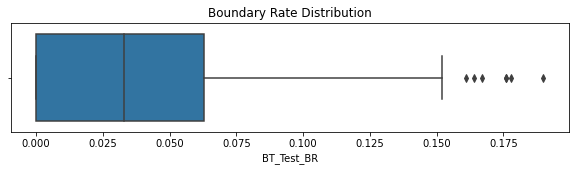

In [26]:
plt.figure(figsize=(10,2))
p1 = sns.boxplot(data=df, x='BT_Test_BR')
p1.set(title='Boundary Rate Distribution')
plt.show()

In [27]:
temp_df = df[(np.abs(stats.zscore(df['BT_Test_BR'])) > 3)]
print(temp_df.shape)
temp_df[["name", "year", "BT_Test_M", "BT_Test_Runs","team", "BT_Test_BF", "BT_Test_SR", "BT_Test_BR"]].sort_values("BT_Test_BR", ascending=False).head(20)

(9, 77)


,name,year,BT_Test_M,BT_Test_Runs,team,BT_Test_BF,BT_Test_SR,BT_Test_BR
4058,Gudakesh Motie,1995,1,23,West Indies,21,109.52,0.190
3943,Sharjeel Khan,1989,1,44,Pakistan,45,97.78,0.178
4448,Mujeeb Ur Rahman,2001,1,18,Afghanistan,17,105.88,0.176
4475,Muhammad Musa,2000,1,16,Pakistan,17,94.12,0.176
3474,Brandon Jeremy Bess,1987,1,11,West Indies,12,91.67,0.167
324,Praveen Kumar,1986,6,149,India,159,93.71,0.164
4361,Keemo Paul,1998,3,96,West Indies,118,81.36,0.161
4501,Abrar Ahmed,1998,1,24,Pakistan,33,72.73,0.152
4481,Harry Brook,1999,3,369,England,371,99.46,0.151


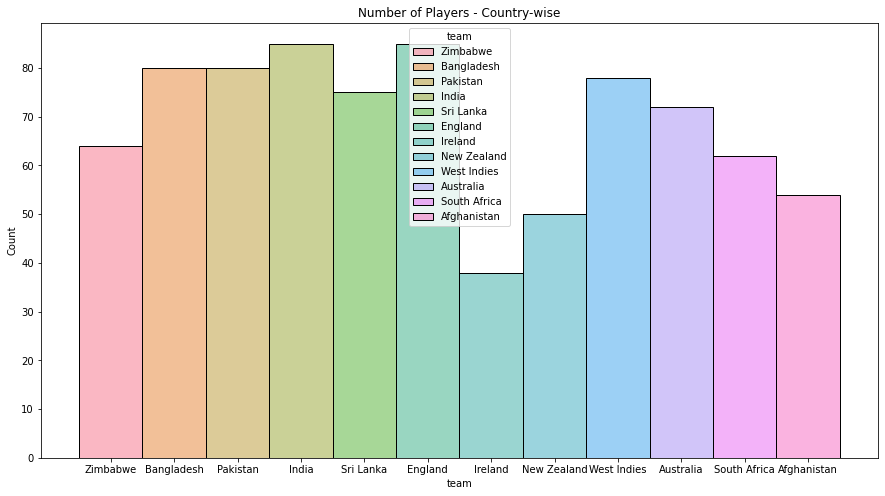

In [28]:
plt.figure(figsize=(15,8))
p1 = sns.histplot(data=df, x='team', hue='team', legend=True)
p1.set(title='Number of Players - Country-wise')
plt.show()

In [29]:
df.head()

,name,team,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year,BT_Test_BR
91,Elton Chigumbura,Zimbabwe,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,14,22,1806,966,21,5 for 54,6 for 133,3.21,46.00,86.00,1,0,213,132,4339,4274,101,4 for 28,5.91,42.32,42.96,0,0,56,20,258,404,14,4 for 31,9.40,28.86,18.43,0,0,1986,0.064
96,Brendan Taylor,Zimbabwe,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,34,4,42,38,0,0 for 6,0 for 6,5.43,0.00,0.00,0,0,205,21,396,406,9,3 for 54,6.15,45.11,44.00,0,0,44,2,30,17,1,1 for 16,3.40,17.00,30.00,0,0,1986,0.067
101,Nazmul Hossain,Bangladesh,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,2,3,329,194,5,2 for 61,3 for 80,3.54,38.80,65.80,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,4,4,42,67,1,1 for 15,9.57,67.00,42.00,0,0,1987,0.143
150,Graeme Cremer,Zimbabwe,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,19,27,4214,2604,57,5 for 125,9 for 275,3.71,45.68,73.93,1,0,96,95,4680,3598,119,6 for 46,4.61,30.24,39.33,3,0,29,28,570,660,35,3 for 11,6.95,18.86,16.29,0,0,1986,0.030
158,Zulqarnain Haider,Pakistan,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,1,0,0,0,0,0,0,0.00,0.00,0.00,0,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,3,0,0,0,0,0,0.00,0.00,0.00,0,0,1986,0.075


In [30]:
df.columns

Index(['name', 'team', 'BT_Test_M', 'BT_Test_Inn', 'BT_Test_NO',
       'BT_Test_Runs', 'BT_Test_HS', 'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR',
       'BT_Test_100', 'BT_Test_200', 'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s',
       'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS',
       'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200',
       'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BT_T20I_M', 'BT_T20I_Inn',
       'BT_T20I_NO', 'BT_T20I_Runs', 'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF',
       'BT_T20I_SR', 'BT_T20I_100', 'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s',
       'BT_T20I_6s', 'BW_Test_M', 'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs',
       'BW_Test_Wkts', 'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ',
       'BW_Test_Avg', 'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 'BW_ODI_M',
       'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM',
       'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W',
       'BW_T20I_M

In [31]:
t_df = df[['name', 'team', 'BT_Test_M', 'BT_Test_Inn', 'BT_Test_NO',
       'BT_Test_Runs', 'BT_Test_HS', 'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR',
       'BT_Test_100', 'BT_Test_200', 'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s','BW_Test_M', 'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs',
       'BW_Test_Wkts', 'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ',
       'BW_Test_Avg', 'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W','BT_Test_BR']]


In [32]:
t_df

,name,team,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR
91,Elton Chigumbura,Zimbabwe,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,14,22,1806,966,21,5 for 54,6 for 133,3.21,46.00,86.00,1,0,0.064
96,Brendan Taylor,Zimbabwe,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,34,4,42,38,0,0 for 6,0 for 6,5.43,0.00,0.00,0,0,0.067
101,Nazmul Hossain,Bangladesh,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,2,3,329,194,5,2 for 61,3 for 80,3.54,38.80,65.80,0,0,0.143
150,Graeme Cremer,Zimbabwe,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,19,27,4214,2604,57,5 for 125,9 for 275,3.71,45.68,73.93,1,0,0.030
158,Zulqarnain Haider,Pakistan,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,1,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,Clive Madande,Zimbabwe,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0.000
5239,Munim Shahriar,Bangladesh,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0.000
5240,Justin Broad,South Africa,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0.000
5322,John Masara,Zimbabwe,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0.000


In [33]:
t_df.drop(['team'],axis=1,inplace=True)

In [34]:
t_df.head()

,name,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR
91,Elton Chigumbura,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,14,22,1806,966,21,5 for 54,6 for 133,3.21,46.00,86.00,1,0,0.064
96,Brendan Taylor,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,34,4,42,38,0,0 for 6,0 for 6,5.43,0.00,0.00,0,0,0.067
101,Nazmul Hossain,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,2,3,329,194,5,2 for 61,3 for 80,3.54,38.80,65.80,0,0,0.143
150,Graeme Cremer,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,19,27,4214,2604,57,5 for 125,9 for 275,3.71,45.68,73.93,1,0,0.030
158,Zulqarnain Haider,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,1,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0.075


In [35]:
s = '3 for 10'
l = s.split()
l.remove('for')
l
nl = [float(x) for x in l]
k = nl[0]/nl[1]
k

def conv_num(st):
    if st !='0':
        try:    
            l = st.split()
            l.remove('for')
            nl = [float(x) for x in l]
            k = nl[0]/nl[1]
            return k
        except:
            l = st.split()
            l.remove('for')
            nl = [float(x) for x in l]
            if nl[0] != 0:
                return nl[0]
            else:
                return 0
            
    else:
        return 0

In [36]:
t_df['BW_Test_BBI'] = t_df['BW_Test_BBI'].apply(conv_num)
t_df['BW_Test_BBM'] = t_df['BW_Test_BBM'].apply(conv_num)

In [37]:
t_df.head()

,name,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR
91,Elton Chigumbura,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,14,22,1806,966,21,0.092593,0.045113,3.21,46.00,86.00,1,0,0.064
96,Brendan Taylor,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,34,4,42,38,0,0.000000,0.000000,5.43,0.00,0.00,0,0,0.067
101,Nazmul Hossain,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,2,3,329,194,5,0.032787,0.037500,3.54,38.80,65.80,0,0,0.143
150,Graeme Cremer,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,19,27,4214,2604,57,0.040000,0.032727,3.71,45.68,73.93,1,0,0.030
158,Zulqarnain Haider,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,1,0,0,0,0,0.000000,0.000000,0.00,0.00,0.00,0,0,0.075


In [38]:
t_df.shape

(823, 27)

In [39]:
t_df['mor_col'] = t_df['BT_Test_NO']+ t_df['BT_Test_Runs']+ t_df['BT_Test_HS']+ t_df['BT_Test_Avg']+\
                t_df['BT_Test_SR'] + t_df['BT_Test_100']+ t_df['BT_Test_200']+ t_df['BT_Test_50']+\
                t_df['BT_Test_4s']+ t_df['BT_Test_6s']+ t_df['BT_Test_BR'] +\
                t_df['BW_Test_Wkts']  + t_df['BW_Test_BBI'] + t_df['BW_Test_5W'] + t_df['BW_Test_10W']

t_df['les_col'] =   t_df['BW_Test_Runs'] + t_df['BW_Test_Econ']+ t_df['BW_Test_Avg'] + t_df['BW_Test_SR']

In [40]:
t_df['impact_col'] = np.sqrt(t_df['mor_col']/t_df['les_col'])

In [41]:
t_df.head()

,name,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR,mor_col,les_col,impact_col
91,Elton Chigumbura,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,14,22,1806,966,21,0.092593,0.045113,3.21,46.00,86.00,1,0,0.064,827.446593,1101.21,0.866832
96,Brendan Taylor,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,34,4,42,38,0,0.000000,0.000000,5.43,0.00,0.00,0,0,0.067,2881.387000,43.43,8.145277
101,Nazmul Hossain,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,2,3,329,194,5,0.032787,0.037500,3.54,38.80,65.80,0,0,0.143,118.365787,302.14,0.625906
150,Graeme Cremer,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,19,27,4214,2604,57,0.040000,0.032727,3.71,45.68,73.93,1,0,0.030,804.020000,2727.32,0.542957
158,Zulqarnain Haider,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,1,0,0,0,0,0.000000,0.000000,0.00,0.00,0.00,0,0,0.075,279.855000,0.00,inf


In [42]:
subset_df = t_df[(t_df['BT_Test_Inn'] == 0) & (t_df['BW_Test_Inn'] == 0)]

In [43]:
subset_df

,name,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR,mor_col,les_col,impact_col
275,Ryan Higgins,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
289,Farhad Reza,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
291,Friday Kasteni,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
292,Tafadzwa Mufambisi,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
297,Tanmay Mishra,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,Clive Madande,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
5239,Munim Shahriar,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
5240,Justin Broad,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
5322,John Masara,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN


In [44]:
t_df.drop(subset_df.index,axis=0,inplace=True)

In [45]:
t_df

,name,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR,mor_col,les_col,impact_col
91,Elton Chigumbura,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,14,22,1806,966,21,0.092593,0.045113,3.21,46.00,86.00,1,0,0.064,827.446593,1101.21,0.866832
96,Brendan Taylor,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,34,4,42,38,0,0.000000,0.000000,5.43,0.00,0.00,0,0,0.067,2881.387000,43.43,8.145277
101,Nazmul Hossain,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,2,3,329,194,5,0.032787,0.037500,3.54,38.80,65.80,0,0,0.143,118.365787,302.14,0.625906
150,Graeme Cremer,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,19,27,4214,2604,57,0.040000,0.032727,3.71,45.68,73.93,1,0,0.030,804.020000,2727.32,0.542957
158,Zulqarnain Haider,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,1,0,0,0,0,0.000000,0.000000,0.00,0.00,0.00,0,0,0.075,279.855000,0.00,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,Brian Mudzinganyama,1,1,0,16,16,16.00,62,25.81,0,0,0,2,0,1,0,0,0,0,0.000000,0.000000,0.00,0.00,0.00,0,0,0.032,75.842000,0.00,inf
5046,Zahid Mahmood,2,4,0,18,17,4.50,84,21.43,0,0,0,2,1,2,4,375,434,12,0.017021,0.052174,6.94,36.17,31.25,0,0,0.036,75.983021,508.36,0.386610
5122,Maheesh Theekshana,2,3,0,59,38,19.67,149,39.60,0,0,0,6,1,2,4,365,188,5,0.071429,0.039474,3.09,37.60,73.00,0,0,0.047,168.388429,301.69,0.747095
5130,Sajid Khan,7,7,0,73,21,10.43,168,43.45,0,0,0,13,0,7,13,1666,832,22,0.190476,0.093750,3.00,37.82,75.73,1,1,0.077,185.147476,948.55,0.441803


In [46]:
t_df = t_df.replace([np.inf,np.nan],100)

In [47]:
t_df

,name,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR,mor_col,les_col,impact_col
91,Elton Chigumbura,14,27,0,569,88,21.07,1133,50.22,0,0,4,67,6,14,22,1806,966,21,0.092593,0.045113,3.21,46.00,86.00,1,0,0.064,827.446593,1101.21,0.866832
96,Brendan Taylor,34,68,4,2320,171,36.25,4138,56.07,6,0,12,254,22,34,4,42,38,0,0.000000,0.000000,5.43,0.00,0.00,0,0,0.067,2881.387000,43.43,8.145277
101,Nazmul Hossain,2,4,2,16,8,8.00,21,76.19,0,0,0,2,1,2,3,329,194,5,0.032787,0.037500,3.54,38.80,65.80,0,0,0.143,118.365787,302.14,0.625906
150,Graeme Cremer,19,38,5,540,102,16.36,1657,32.59,1,0,0,47,2,19,27,4214,2604,57,0.040000,0.032727,3.71,45.68,73.93,1,0,0.030,804.020000,2727.32,0.542957
158,Zulqarnain Haider,1,2,0,88,88,44.00,201,43.78,0,0,1,15,0,1,0,0,0,0,0.000000,0.000000,0.00,0.00,0.00,0,0,0.075,279.855000,0.00,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,Brian Mudzinganyama,1,1,0,16,16,16.00,62,25.81,0,0,0,2,0,1,0,0,0,0,0.000000,0.000000,0.00,0.00,0.00,0,0,0.032,75.842000,0.00,100.000000
5046,Zahid Mahmood,2,4,0,18,17,4.50,84,21.43,0,0,0,2,1,2,4,375,434,12,0.017021,0.052174,6.94,36.17,31.25,0,0,0.036,75.983021,508.36,0.386610
5122,Maheesh Theekshana,2,3,0,59,38,19.67,149,39.60,0,0,0,6,1,2,4,365,188,5,0.071429,0.039474,3.09,37.60,73.00,0,0,0.047,168.388429,301.69,0.747095
5130,Sajid Khan,7,7,0,73,21,10.43,168,43.45,0,0,0,13,0,7,13,1666,832,22,0.190476,0.093750,3.00,37.82,75.73,1,1,0.077,185.147476,948.55,0.441803


In [48]:
t_df.drop(['mor_col','les_col'],axis=1,inplace=True)

In [49]:
t_df.columns

Index(['name', 'BT_Test_M', 'BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs',
       'BT_Test_HS', 'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100',
       'BT_Test_200', 'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s', 'BW_Test_M',
       'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts',
       'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ', 'BW_Test_Avg',
       'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 'BT_Test_BR', 'impact_col'],
      dtype='object')

In [50]:
t_df_col = ['BT_Test_NO', 'BT_Test_Runs','BT_Test_HS', 'BT_Test_Avg', 'BT_Test_SR', 'BT_Test_100',
       'BT_Test_200', 'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s', 'BW_Test_Runs', 'BW_Test_Wkts',
       'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ', 'BW_Test_Avg','BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 
       'BT_Test_BR', 'impact_col']

In [51]:
t_df.isna().sum().max()

0

In [52]:
def min_max_scaling(ser):
    return (ser - ser.min()) / (ser.max() - ser.min())

for col in t_df_col:
    t_df[col] = min_max_scaling(t_df[col])

In [53]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1,15):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(t_df[t_df_col])
    inertia.append(kmeans.inertia_)

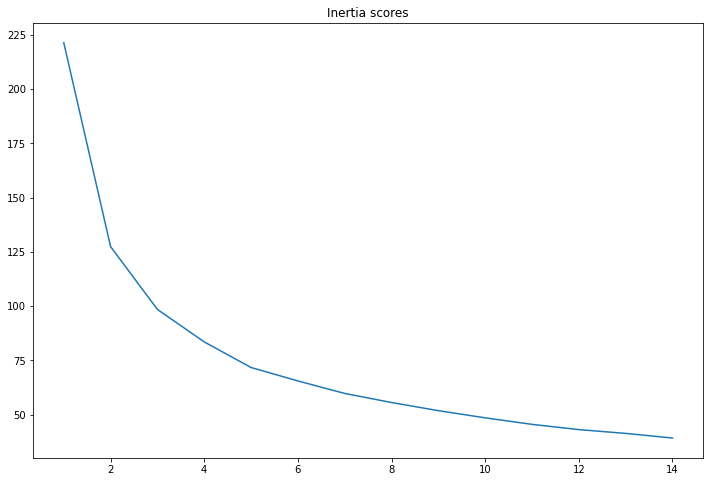

In [54]:
plt.figure(figsize = (12,8))
plt.plot(range(1,15),inertia)
plt.title('Inertia scores')
plt.show()

In [55]:
kmeans = KMeans(n_clusters = 5, random_state=7)
t_df['cluster'] = kmeans.fit_predict(t_df[t_df_col])

In [56]:
t_df.head()

,name,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BT_Test_BR,impact_col,cluster
91,Elton Chigumbura,14,27,0.000000,0.053533,0.262687,0.146319,1133,0.390604,0.000000,0.0,0.072727,0.056828,0.056075,14,22,1806,0.061450,0.037102,0.030864,0.022556,0.214000,0.151815,0.149826,0.033333,0.0,0.336842,0.008668,0
96,Brendan Taylor,34,68,0.085106,0.218271,0.510448,0.251736,4138,0.436105,0.206897,0.0,0.218182,0.215437,0.205607,34,4,42,0.002417,0.000000,0.000000,0.000000,0.362000,0.000000,0.000000,0.000000,0.0,0.352632,0.081453,0
101,Nazmul Hossain,2,4,0.042553,0.001505,0.023881,0.055556,21,0.592595,0.000000,0.0,0.000000,0.001696,0.009346,2,3,329,0.012341,0.008834,0.010929,0.018750,0.236000,0.128053,0.114634,0.000000,0.0,0.752632,0.006259,0
150,Graeme Cremer,19,38,0.106383,0.050804,0.304478,0.113611,1657,0.253481,0.034483,0.0,0.000000,0.039864,0.018692,19,27,4214,0.165649,0.100707,0.013333,0.016364,0.247333,0.150759,0.128798,0.033333,0.0,0.157895,0.005430,2
158,Zulqarnain Haider,1,2,0.000000,0.008279,0.262687,0.305556,201,0.340515,0.000000,0.0,0.018182,0.012723,0.000000,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.394737,1.000000,1


In [57]:
t_df.cluster.value_counts()

0    162
2    157
1    109
4     25
3     25
Name: cluster, dtype: int64

In [58]:
df1 = t_df[t_df['cluster'] == 0]
df2 = t_df[t_df['cluster'] == 1]
df3 = t_df[t_df['cluster'] == 2]
df4 = t_df[t_df['cluster'] == 3]
df5 = t_df[t_df['cluster'] == 4]


In [59]:
def get_df(name):

    for df in [df1, df2, df3, df4, df5]:
        if any(np.isin(df.name.values,name) == True):
            return df
        else:
            pass

     
def player_recommendation(name,method=''):
    recommendation = []
    r_df = get_df(name)
    a = r_df.loc[r_df['name']==name][t_df_col]
    a = np.array(a)
    for num in r_df.index:
        b = r_df.loc[r_df.index==num][t_df_col]
        b = np.array(b)
        c = distance.euclidean(a,b)
        recommendation.append([r_df.loc[r_df.index==num]['name'],c])
        recommendation.sort(key=lambda a: a[1])
    return [recommendation[1][0].values[0],recommendation[2][0].values[0],recommendation[3][0].values[0],recommendation[4][0].values[0]]

In [60]:
player_recommendation('Virat Kohli')

['Kane Williamson', 'Steven Smith', 'Joe Root', 'Cheteshwar Pujara']

In [61]:
player_recommendation('Jasprit Bumrah')

['Junaid Khan', 'Shahadat Hossain', 'Mohammad Amir', 'Steven Finn']

In [62]:
import pickle

with open('test_player.pkl', 'wb') as f:
    pickle.dump(player_recommendation, f)

In [63]:
pl_list = ['Rohit Sharma','David Warner','Steven Smith','Virat Kohli','Ben Stokes','Ravindra Jadeja',
           'Ravichandran Ashwin','Tom Latham','Mohammed Siraj','Pat Cummins','Kagiso Rabada']

def team_recom(pl_list):
    opp_list = []

    for x in pl_list:
        new_pls = player_recommendation(x)
        if ((new_pls[0] not in opp_list) and (new_pls[0] not in pl_list)):
            opp_list.append(new_pls[0])
        elif ((new_pls[1] not in opp_list) and (new_pls[1] not in pl_list)):
            opp_list.append(new_pls[1])
        elif ((new_pls[2] not in opp_list) and (new_pls[2] not in pl_list)):
            opp_list.append(new_pls[2])
        else:
            opp_list.append(new_pls[3])
    return opp_list


    


    
    

In [64]:
team_recom(pl_list=pl_list)

['Kusal Mendis',
 'Kane Williamson',
 'Joe Root',
 'Cheteshwar Pujara',
 'Angelo Mathews',
 'Jason Holder',
 'Yasir Shah',
 'Mushfiqur Rahim',
 'Robiul Islam',
 'Taijul Islam',
 'Mehidy Hasan Miraz']

In [65]:
with open('test_team.pkl', 'wb') as f:
    pickle.dump(team_recom, f)